In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import sqlalchemy
import api_info

In [2]:
username = api_info.USERNAME
password = api_info.PASSWORD
host = api_info.HOST
port = api_info.PORT
db_name = api_info.DB_NAME
endpoint = 'postgresql://' + username + ':' + password + '@' + host + ':' + port + '/' + db_name
engine = sqlalchemy.create_engine(endpoint)

In [24]:
df = pd.read_sql_query('SELECT datadate,gvkey,cusip,niq,epspiq,cshprq,oepsxy FROM quarterly',engine)
df.tail()
# NIQ = Net Income (Loss)
# EPSPIQ = Earnings Per Share (Basic) - Including Extraordinary Items 
# CSHPRQ = Common Shares Used to Calculate Earnings Per Share - Basic
# GVKEY = Global Company Key
# OEPSXY = Earnings Per Share - Diluted - from Operations

,datadate,gvkey,cusip,niq,epspiq,cshprq,oepsxy
194942,2001-09-30,063417,89854H102,2.126,0.03,76.336,0.28
194943,2001-12-31,063417,89854H102,7.183,0.09,76.607,0.38
194944,2002-03-31,063417,89854H102,-4.779,-0.06,76.755,0.09
194945,2002-06-30,063417,89854H102,3.913,0.05,77.335,0.18
194946,2002-09-30,063417,89854H102,6.217,0.08,76.694,0.26


In [25]:
unum = df[df["cusip"] == '91529Y106']
print(unum.shape)
unum.head()

(92, 7)


,datadate,gvkey,cusip,niq,epspiq,cshprq,oepsxy
184158,2001-03-31,012726,91529Y106,182.0,0.75,241.411,0.75
184159,2001-06-30,012726,91529Y106,146.1,0.60,241.721,1.35
184160,2001-09-30,012726,91529Y106,127.1,0.53,242.021,1.87
184161,2001-12-31,012726,91529Y106,124.0,0.51,242.131,2.40
184162,2002-03-31,012726,91529Y106,87.9,0.36,242.597,0.39


,datadate,gvkey,cusip,niq,epspiq,cshprq,oepsxy


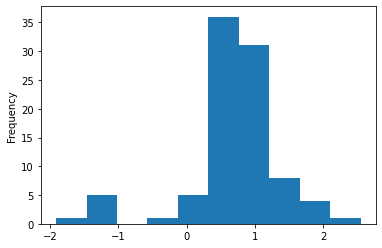

In [26]:
unum["epspiq"].plot(kind='hist')
outlier_epspiq = unum[unum["epspiq"] > 500]
outlier_epspiq.head()

(147292, 7)


,datadate,gvkey,cusip,niq,epspiq,cshprq,oepsxy
0,2002-12-31,063417,89854H102,-22.106,-0.30,74.749,0.39
1,2003-03-31,063417,89854H102,2.765,0.04,74.117,0.03
4,2003-12-31,063417,89854H102,6.895,0.09,74.381,0.07
5,2004-03-31,063417,89854H102,1.401,0.02,75.069,0.04
6,2004-06-30,063417,89854H102,2.390,0.03,74.519,0.13


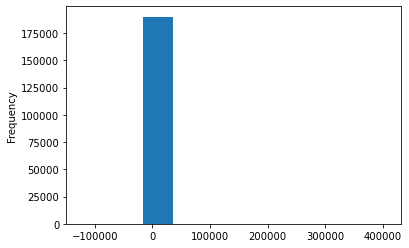

In [40]:
df["oepsxy"].plot(kind='hist')
df_oepsxy_filter = df[(df["oepsxy"] < 1000) & (df["oepsxy"] > 0)]
print(df_oepsxy_filter.shape)
df_oepsxy_filter.head()

In [45]:
df_oepsxy_filter["eps_ebitda_ratio"] = df_oepsxy_filter["epspiq"] / df_oepsxy_filter["oepsxy"]
df_oepsxy_filter.head()
df_oepsxy_filter.sort_values(by='eps_ebitda_ratio',ascending=False).head()

<ipython-input-45-3098aaaff8a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oepsxy_filter["eps_ebitda_ratio"] = df_oepsxy_filter["epspiq"] / df_oepsxy_filter["oepsxy"]


,datadate,gvkey,cusip,niq,epspiq,cshprq,oepsxy,eps_ebitda_ratio
169157,2001-03-31,142460,704551100,117.037,4.25,27.541,0.01,425.0
175266,2007-12-31,003410,893617209,34.923,4.29,8.083,0.02,214.5
30736,2022-03-31,031477,114340102,2119.873,28.28,74.958,0.14,202.0
188727,2013-12-31,023978,912909108,270.000,1.87,144.740,0.01,187.0
86536,2007-03-31,166368,20451Q104,36.921,1.81,20.450,0.01,181.0


In [44]:
df_oepsxy_filter.query("eps_ebitda_ratio > 100000000")

,datadate,gvkey,cusip,niq,epspiq,cshprq,oepsxy,eps_ebitda_ratio
